In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import imutils
# defining global variable path
train_path = "Downloads/train"
test_path = "Downloads/test"


def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
    return image_files

In [2]:
train=loadImages(train_path)
test=loadImages(test_path)

View image

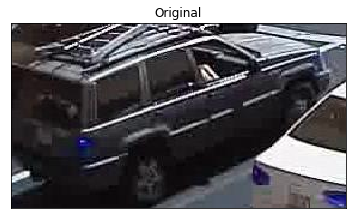

In [3]:
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

img = cv2.imread(test[2], cv2.IMREAD_UNCHANGED)
display_one(img)

Preprocessing


In [4]:
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    # --------------------------------
    # setting dim of the resize
    height = 50
    width = 50
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)
    return res_img
    #gray = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in res_img]
    no_noise = []
    for i in range(len(gray)):
        blur = cv2.GaussianBlur(gray[i], (5, 5), 0)
        no_noise.append(blur)
    #return no_noise

In [ ]:
train_x = processing(train)
test_x = processing(test)
display_one(test_x[2])

HOG

In [6]:
from skimage.feature import hog
from skimage import data, color, exposure

In [7]:
hog_features=[]
def hog_img(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(2, 2),visualize=True,block_norm='L2')
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range=(0,0.5))
    hog_features.append(fd)
    return hog_image_rescaled



In [10]:
len(hog_features)

200000

In [9]:
train_hog=[hog_img(i) for i in train_x]
test_hog=[hog_img(i) for i in test_x]

In [11]:
def ShowDiff(original,hoged):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

    ax[0].axis('off')
    ax[0].imshow(original, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_adjustable('box-forced')
    ax[1].axis('off')
    ax[1].imshow(hoged, cmap=plt.cm.gray)
    ax[1].set_title('Histogram of Oriented Gradients')
    ax[1].set_adjustable('box-forced')

    plt.show()

/Users/ankit/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


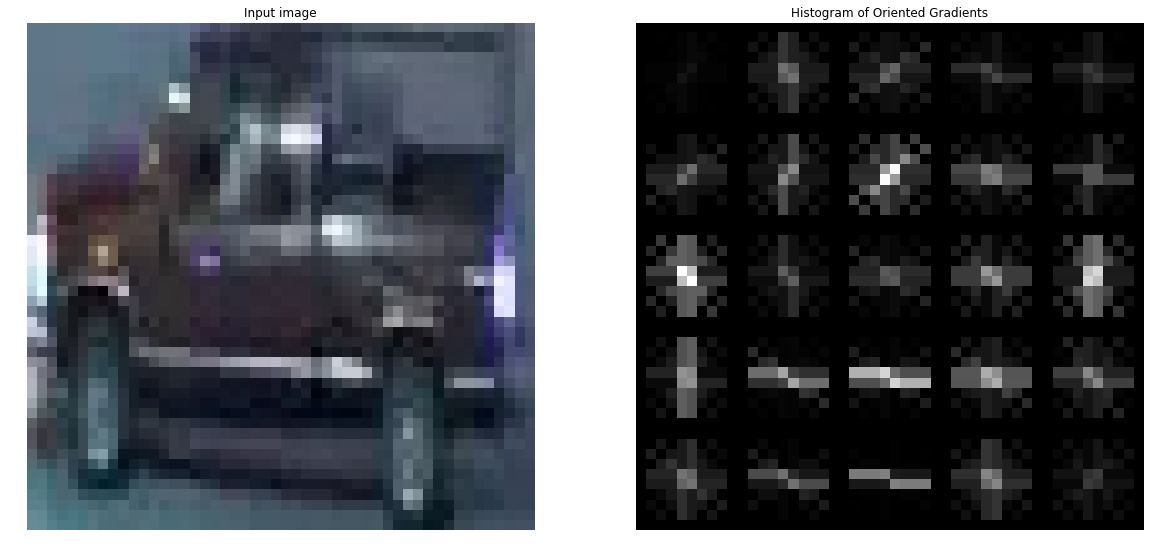

In [12]:
ShowDiff(train_x[0],train_hog[0])

Importing labels

In [3]:
import pandas as pd
labels=pd.read_csv('Downloads/trainLabels.csv')

In [6]:
labels.head()

,id,label
0,1,0
1,2,1
2,3,1
3,4,2
4,5,3


In [5]:
labels['label']=pd.factorize(labels['label'])[0]

In [8]:
my_labels=list(labels['label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features, my_labels, random_state=42)

PCA 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

In [20]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [22]:
len(test_img)

100000

In [21]:
len(train_img)

100000

In [23]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
clf = svm.SVC()
clf.fit(train_img,y_train)

/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = clf.predict(test_img)

In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)